In [1]:
import numpy as np
import math
from enum import Enum
from collections import namedtuple

# matplotlib
# ライブラリーのインポート
import matplotlib.pyplot as plt
# インライン表示
%matplotlib inline

# 日本語フォント
import pylab
from matplotlib.font_manager import FontProperties
# 日本語フォント
fp = FontProperties(fname='C:\WINDOWS\Fonts\msgothic.ttc', size = 12)

# 第四章　暖冷房設備

# 第二節　ダクト式セントラル空調機

## 1.　適用範囲

本節でいう「ダクト式セントラル空調機」とは、ヒートポンプを熱源とし、専ら機外静圧を持った状態で運転されることを想定して、ダクト等により住戸全体を空調するように計画された家庭用の空調設備である。

本計算方法は、以下を満たすダクト式セントラル空調機のエネルギー消費量及び最大出力について適用する。
* 循環用送風機が室内機と一体として用意されている。
* JIS B8616が定める定格暖房標準能力および定格冷房標準能力の定義に基づき、JIS B 8615-2が定める性能試験により定格暖房能力および定格消費電力、定格冷房能力および定格冷房消費電力が測定されている。
* サーモオフ機能が搭載されている。

## 5.　最大暖房出力

日付$d$の時刻$t$における1時間当たりの最大暖房出力$Q_{max,H,d,t}$は、式(1)により表される。

$$ 
\begin{equation*}
    Q_{max,H,d,t} = q_{ac,H,rtd} \times C_{df,d,t} \times 3600 \times 10^{-6}
\end{equation*}
$$


<div style="text-align: right;"> (1) </div>

ここで、  

$Q_{max,H,d,t}$：日付$d$の時刻$t$における1時間当たりの最大暖房出力(MJ/h)  
$q_{ac,H,rtd}$：空調機の定格暖房能力(W)  
$C_{df,d,t}$：日付$d$の時刻$t$におけるデフロストに関する暖房出力補正係数(-)  

である。

空調機の定格暖房能力$q_{ac,H,rtd}$は、付録Aにより定まる。

In [2]:
def Q_max_H(q_ac_H_rtd, C_df):
    '''最大暖房出力(MJ/h)を計算する'''
    # q_ac_H_rtd: 空調機の定格暖房能力(W)
    # C_df: デフロストに関する暖房出力補正係数(-)

    return q_ac_H_rtd * C_df * 3600 * 10**(-6)

日付$d$の時刻$t$におけるデフロストに関する暖房出力補正係数$C_{df,d,t}$は、外気温度$\theta_{ex,d,t}$が5℃未満かつ外気相対湿度$h_{ex,d,t}$が80%以上の場合にデフロストが発生するとして、式(2)により定まる。

<p style="text-indent:2em">外気温度$\theta_{ex,d,t}$が5℃未満かつ外気相対湿度$h_{ex,d,t}$が80%以上の場合：</p>  
$$ 
\begin{equation*}
   C_{df,d,t} = 0.77
\end{equation*}
$$


<div style="text-align: right;"> (2-1) </div>

<p style="text-indent:2em">外気温度$\theta_{ex,d,t}$が5℃以上かつ外気相対湿度$h_{ex,d,t}$が80%未満の場合：</p>  
$$ 
\begin{equation*}
   C_{df,d,t} = 1.0
\end{equation*}
$$


<div style="text-align: right;"> (2-2) </div>

ここで、  

$C_{df,d,t}$：日付$d$の時刻$t$におけるデフロストに関する暖房出力補正係数(-)  
$h_{ex,d,t}$：日付$d$の時刻$t$における外気相対湿度(%)  
$\theta_{ex,d,t}$：日付$d$の時刻$t$における外気温度(℃)  

である。

In [3]:
def get_C_df(theta_ex, h_ex):
    '''デフロストに関する暖房出力補正係数(-)を取得する'''
    # theta_ex: 外気温度(℃)
    # h_ex: 外気相対湿度(%)
    
    if theta_ex < 5 and 80<= h_ex:
        return  0.77
    else:
        return  1.0

Example：

In [4]:
np.vectorize(get_C_df)([[4],[5],[6]],[79,80,81])

array([[1.  , 0.77, 0.77],
       [1.  , 1.  , 1.  ],
       [1.  , 1.  , 1.  ]])

Example：

In [5]:
Q_max_H(1000, get_C_df(20, 70))

3.5999999999999996

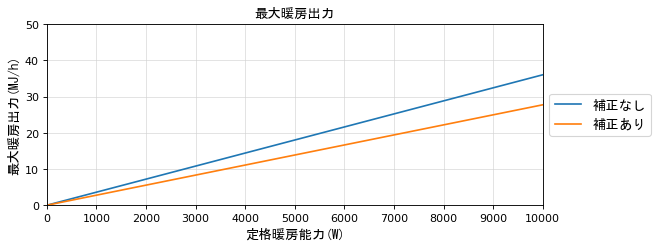

In [6]:
# 出力結果
plt.figure(figsize = (8, 3), dpi=80 )
plt.subplot2grid((1, 1), (0, 0))
plt.title('最大暖房出力', fontdict={'fontproperties':fp})

for i,category in enumerate(['補正なし','補正あり']):
    x_values =[x for x in range(0, 10000)]
    y_values = {'補正なし' :[Q_max_H(x, get_C_df(20, 70)) for x in x_values],
                '補正あり' :[Q_max_H(x, get_C_df( 0, 90)) for x in x_values]}[category]
    plt.plot(x_values, y_values, label=category)
        
ax=plt.gca()
ax.set_xlabel('定格暖房能力(W)', fontdict={'fontproperties':fp})
ax.set_xticks([x for x in range(0, 11000, 1000)], minor=False)
ax.set_xbound(lower=0, upper=10000)

ax.set_ylabel('最大暖房出力(MJ/h)', fontdict={'fontproperties':fp})
ax.set_yticks([y for y in range(0, 60, 10)], minor=False)
ax.set_ybound(lower=0, upper=50)

ax.grid(which='major', color='lightgray', alpha=0.7, linestyle='-')     
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), borderaxespad=0.5, frameon=True, prop=fp)

plt.show()

## 6.　暖房エネルギー消費量

### 6.1　消費電力量

日付$d$の時刻$t$における1時間当たりの暖房の消費電力量$E_{E,H,d,t}$は、式(3)により表される。

$$ 
\begin{equation*}
    E_{E,H,d,t} = E_{E,comp,H,d,t} + E_{E,fan,H,d,t} 
\end{equation*}
$$


<div style="text-align: right;"> (3) </div>

ここで、  

$E_{E,fan,H,d,t}$：日付$d$の時刻$t$における1時間当たりの送風機の消費電力量のうちの暖房設備への付加分(kWh/h)  
$E_{E,comp,H,d,t}$：日付$d$の時刻$t$における暖房時の1時間当たりの圧縮機の消費電力量(kWh/h)  
$E_{E,H,d,t}$：日付$d$の時刻$t$における1時間当たりの暖房の消費電力量(kWh/h)  

である。

In [7]:
def E_E_H(E_E_comp_H, E_E_fan_H):
    '''暖房の消費電力量(kWh/h)を計算する'''
    # E_E_comp_H：圧縮機の消費電力量(kWh/h)  
    # E_E_fan_H：送風機の消費電力量(kWh/h)
    
    return E_E_comp_H + E_E_fan_H

### 6.2　ガス消費量

（省略）

### 6.3　石油消費量

（省略）

### 6.4　その他の燃料による一次エネルギー消費量

（省略）

## 7.　最大冷房出力

（工事中）

## 8.　冷房エネルギー消費量

（工事中）

## 9.　換気エネルギー消費量

（工事中）

## 10.　圧縮機

### 10.1　消費電力量

#### 10.1.1　暖房

日付$d$の時刻$t$における暖房時の1時間当たりの圧縮機の消費電力量$E_{E,comp,H,d,t}$は、式(4)により表される。

$$ 
\begin{equation*}
    E_{E,comp,H,d,t} = \frac{{Q'_{T,H,d,t}}} {\eta_{H,d,t} \times e_{th,H,d,t} \times C_{df,d,t}}
\end{equation*}
$$


<div style="text-align: right;"> (4) </div>

ここで、  

$C_{df,d,t}$：日付$d$の時刻$t$におけるデフロストに関する暖房出力補正係数(-)  
$E_{E,comp,H,d,t}$：日付$d$の時刻$t$における暖房時の1時間当たりの圧縮機の消費電力量(kWh/h)  
$e_{th,H,d,t}$：日付$d$の時刻$t$における冷凍サイクルの理論暖房効率(-)  
$Q'_{T,H,d,t}$：日付$d$の時刻$t$における1時間当たりの補正処理暖房負荷(MJ/h)  
$\eta_{H,d,t}$：日付$d$の時刻$t$における暖房時の圧縮機の圧縮効率(-)  

である。

日付$d$の時刻$t$における冷凍サイクルの理論暖房効率$e_{th,H,d,t}$は、付録Dにより計算される値とする。

In [8]:
def E_E_comp_H(Q_dash_T_H, e_th_H, eta_H, C_df):
    '''暖房時の圧縮機の消費電力量(kWh/h)を計算する'''
    # Q_dash_T_H：補正処理暖房負荷(MJ/h)  
    # e_th_H：冷凍サイクルの理論暖房効率(-)  
    # eta_H：暖房時の圧縮機の圧縮効率(-)  
    # C_df: デフロストに関する暖房出力補正係数(-)
    
    return Q_dash_T_H / (eta_H * e_th_H * C_df)

日付$d$の時刻$t$における1時間当たりの補正処理暖房負荷$Q'_{T,H,d,t}$は、式(5)により表される。

$$ 
\begin{equation*}
    {Q'_{T,H,d,t}} = {Q_{T,H,d,t}} \times {Q_{DL}}
\end{equation*}
$$


<div style="text-align: right;"> (5) </div>

ここで、  

$Q_{DL}$：断熱区画外ダクト熱損失による処理暖房負荷補正係数(-)  
$Q_{T,H,d,t}$：日付$d$の時刻$t$における1時間当たりの処理暖房負荷(MJ/h)  
$Q'_{T,H,d,t}$：日付$d$の時刻$t$における1時間当たりの補正処理暖房負荷(MJ/h)  

である。

日付$d$の時刻$t$における1時間当たりの処理暖房負荷$Q_{T,H,d,t}$は、第四章第一節により計算される値とする。

In [9]:
def Q_dash_T_H(Q_T_H, Q_DL):
    '''補正処理暖房負荷(MJ/h)を計算する'''
    # Q_T_H：処理暖房負荷(MJ/h)  
    # Q_DL: 断熱区画外ダクト熱損失による処理暖房負荷補正係数(-)
    
    return Q_T_H * C_DL

#### 10.1.2　冷房

（工事中）

### 10.2　圧縮効率

#### 10.2.1　暖房

日付$d$の時刻$t$における暖房時の圧縮機の圧縮効率$\eta_{H,d,t}$は、補正処理暖房負荷$Q'_{T,H,d,t}$が空調機の定格暖房能力$q_{ac,H,rtd}$を超える範囲では0.4を下限として、式(6)により表される。

<p style="text-indent:2em">$Q'_{T,H,d,t} \div \left( 3600 \times 10^{-6} \right) \leq q_{ac,H,min}$の場合：</p> 
$$ 
\begin{equation*}
    \eta_{H,d,t} = \eta_{H,min} - \left\{ q_{ac,H,min} - Q'_{T,H,d,t} \div \left( 3600 \times 10^{-6} \right) \right\} \times \frac{\eta_{H,min}}{q_{ac,H,min}}
\end{equation*}
$$

<div style="text-align: right;"> (6-1) </div>

<p style="text-indent:2em">$q_{ac,H,min} < Q'_{T,H,d,t} \div \left( 3600 \times 10^{-6} \right) \leq q_{ac,H,mid} $の場合：</p> 
$$ 
\begin{equation*}
    \eta_{H,d,t} = \eta_{H,mid} - \left\{ q_{ac,H,mid} - Q'_{T,H,d,t} \div \left( 3600 \times 10^{-6} \right) \right\} \times \frac{\eta_{H,mid} - \eta_{H,min}}{q_{ac,H,mid} - q_{ac,H,min}}
\end{equation*}
$$

<div style="text-align: right;"> (6-2) </div>

<p style="text-indent:2em">$q_{ac,H,mid} < Q'_{T,H,d,t} \div \left( 3600 \times 10^{-6} \right) \leq q_{ac,H,rtd} $の場合：</p> 
$$ 
\begin{equation*}
    \eta_{H,d,t} = \eta_{H,rtd} - \left\{ q_{ac,H,rtd} - Q'_{T,H,d,t} \div \left( 3600 \times 10^{-6} \right) \right\} \times \frac{\eta_{H,rtd} - \eta_{H,mid}}{q_{ac,H,rtd} - q_{ac,H,mid}}
\end{equation*}
$$

<div style="text-align: right;"> (6-3) </div>

<p style="text-indent:2em">$q_{ac,H,rtd} < Q'_{T,H,d,t} \div \left( 3600 \times 10^{-6} \right)$の場合：</p> 
$$ 
\begin{equation*}
    \eta_{H,d,t} = max \left( 0.4, \: \eta_{H,rtd} - \left\{ Q'_{T,H,d,t} \div \left( 3600 \times 10^{-6} \right) - q_{ac,H,rtd} \right\} \times \frac{\eta_{H,rtd}}{q_{ac,H,rtd}} \right)
\end{equation*}
$$

<div style="text-align: right;"> (6-4) </div>

ここで、  

$Q'_{T,H,d,t}$：日付$d$の時刻$t$における1時間当たりの補正処理暖房負荷(MJ/h)  
$\eta_{H,d,t}$：日付$d$の時刻$t$における暖房時の圧縮機の圧縮機の圧縮効率(-)  
$\eta_{H,mid}$：中間暖房能力運転時における圧縮機の圧縮効率(-)  
$\eta_{H,min}$：最小暖房能力運転時における圧縮機の圧縮効率(-)  
$\eta_{H,rtd}$：定格暖房能力運転時における圧縮機の圧縮効率(-)   
$q_{ac,H,mid}$：空調機の中間暖房能力(W)   
$q_{ac,H,min}$：空調機の最小暖房能力(W)   
$q_{ac,H,rtd}$：空調機の定格暖房能力(W) 

である。

空調機の最小暖房能力$q_{ac,H,min}$、空調機の中間暖房能力$q_{ac,H,mid}$および空調機の定格暖房能力$q_{ac,H,rtd}$は、付録Aにより定まる。

In [10]:
def eta_H(Q_dash_T_H, eta_H_min, eta_H_mid, eta_H_rtd, q_ac_H_min, q_ac_H_mid, q_ac_H_rtd):
    '''最小・中間・定格運転時における圧縮機の圧縮効率から当該時刻の値を外挿する'''
    # Q_dash_T_H：補正処理暖房負荷(MJ/h) 
    # eta_H_min：最小暖房能力運転時における圧縮機の圧縮効率(-)
    # eta_H_mid：中間暖房能力運転時における圧縮機の圧縮効率(-)
    # eta_H_rtd：定格暖房能力運転時における圧縮機の圧縮効率(-)
    # q_ac_H_min：空調機の最小暖房能力(W)
    # q_ac_H_mid：空調機の中間暖房能力(W)
    # q_ac_H_rtd：空調機の定格暖房能力(W)
    
    # 単位換算：MJ/h => W
    Q_dash_T_H_Wat = Q_dash_T_H / (3600 * 10**(-6))
    
    if Q_dash_T_H_Wat <= q_ac_H_min:
        return eta_H_min - (q_ac_H_min - Q_dash_T_H_Wat) * eta_H_min / q_ac_H_min
    elif q_ac_H_min < Q_dash_T_H_Wat and Q_dash_T_H_Wat <= q_ac_H_mid:
        return eta_H_mid - (q_ac_H_mid - Q_dash_T_H_Wat) * (eta_H_mid - eta_H_min) / (q_ac_H_mid - q_ac_H_min)
    elif q_ac_H_mid < Q_dash_T_H_Wat and Q_dash_T_H_Wat <= q_ac_H_rtd:
        return eta_H_rtd - (q_ac_H_rtd - Q_dash_T_H_Wat) * (eta_H_rtd - eta_H_mid) / (q_ac_H_rtd - q_ac_H_mid)
    elif q_ac_H_rtd < Q_dash_T_H_Wat:
        return max(0.4, eta_H_rtd - (Q_dash_T_H_Wat - q_ac_H_rtd) * eta_H_rtd / q_ac_H_rtd)
    
    else:
        raise Exeption

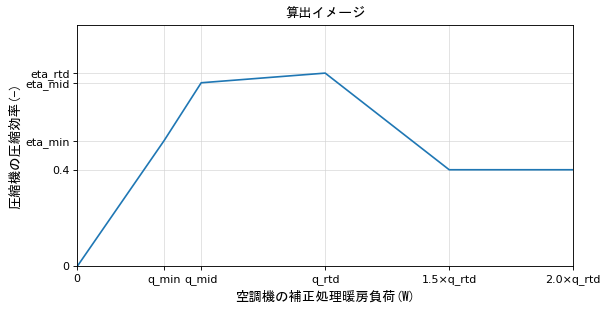

In [11]:
# 算出イメージ
plt.figure(figsize = (8, 4), dpi=80 )
plt.subplot2grid((1, 1), (0, 0))
plt.title('算出イメージ', fontdict={'fontproperties':fp})

q_rtd = 1
eta_rtd = 0.8
x_values =np.arange(0, 2.2, 0.05)
y_values =[eta_H(Q_dash_T_H*(3600 * 10**(-6)), eta_rtd*0.65, eta_rtd*0.95, eta_rtd, q_rtd*0.35, q_rtd*0.5, q_rtd) for Q_dash_T_H in x_values]
plt.plot(x_values, y_values)

        
ax=plt.gca()
ax.set_xlabel('空調機の補正処理暖房負荷(W)', fontdict={'fontproperties':fp})
ax.set_xticks([0, q_rtd*0.35, q_rtd*0.5, q_rtd, q_rtd*1.5, q_rtd*2.0], minor=False)
ax.set_xticklabels(['0', 'q_min', 'q_mid', 'q_rtd', '1.5×q_rtd', '2.0×q_rtd'], minor=False)
ax.set_xbound(lower=0, upper=2)

ax.set_ylabel('圧縮機の圧縮効率(-)', fontdict={'fontproperties':fp})
ax.set_yticks([0, eta_rtd*0.65, eta_rtd*0.95, eta_rtd, 0.4], minor=False)
ax.set_yticklabels(['0', 'eta_min', 'eta_mid', 'eta_rtd', '0.4'])
ax.set_ybound(lower=0, upper=1)

ax.grid(which='major', color='lightgray', alpha=0.7, linestyle='-')     

plt.show()

定格暖房能力運転時における圧縮機の圧縮効率$\eta_{H,rtd}$は、式(7a)により表される。

$$ 
\begin{equation*}
    \eta_{H,rtd} = \frac{e_{H,rtd}}{e_{th,H,rtd}}
\end{equation*}
$$

<div style="text-align: right;"> (7a-1) </div>

ここで、  

$e_{H,rtd}$：定格暖房能力運転時における暖房効率(-)  
$e_{th,H,rtd}$：定格暖房能力運転時における冷凍サイクルの理論暖房効率(-)  
$\eta_{H,rtd}$：定格暖房能力運転時における圧縮機の圧縮効率(-)   

である。

定格暖房能力運転時における冷凍サイクルの理論暖房効率$e_{th,H,rtd}$は、付録Dにより計算される値とする。

中間暖房能力運転時における圧縮機の圧縮効率$\eta_{H,mid}$は、空調機の中間暖房能力$q_{ac,H,mid}$および中間暖房消費電力$P_{ac,H,mid}$にJIS B8616が定める中間暖房標準能力の定義に基づき、JIS B 8615-2が定める性能試験により得られる値を用るか否かに応じて、式(7b)により表される。

<p style="text-indent:2em">JIS性能試験により得られる値を用いる場合：</p>  
$$ 
\begin{equation*}
    \eta_{H,mid} = \frac{e_{H,mid}}{e_{th,H,mid}}
\end{equation*}
$$

<div style="text-align: right;"> (7b-1) </div>

<p style="text-indent:2em">JIS性能試験により得られる値を用いない場合：</p>  
$$ 
\begin{equation*}
    \eta_{H,mid} = \eta_{H,rtd} \times 0.95 
\end{equation*}
$$

<div style="text-align: right;"> (7b-2) </div>

ここで、  

$e_{H,mid}$：中間暖房能力運転時における暖房効率(-)  
$e_{th,H,mid}$：中間暖房能力運転時における冷凍サイクルの理論暖房効率(-)  
$\eta_{H,mid}$：中間暖房能力運転時における圧縮機の圧縮効率(-)  
$\eta_{H,rtd}$：定格暖房能力運転時における圧縮機の圧縮効率(-)   

である。

中間暖房能力運転時における冷凍サイクルの理論暖房効率$e_{th,H,mid}$は、付録Dにより計算される値とする。

最小暖房能力運転時における圧縮機の圧縮効率$\eta_{H,min}$は、空調機の最小暖房能力$q_{ac,H,min}$および最小暖房消費電力$P_{ac,H,min}$にJIS B8616が定める最小暖房標準能力の定義に基づき、JIS B 8615-2が定める性能試験により得られる値を用いるか否かに応じて、式(7c)により表される。

<p style="text-indent:2em">JI性能試験により得られる値を用いる場合：</p>  
$$ 
\begin{equation*}
    \eta_{H,min} = \frac{e_{H,min}}{e_{th,H,min}}
\end{equation*}
$$

<div style="text-align: right;"> (7c-1) </div>

<p style="text-indent:2em">JIS性能試験により得られる値を用いない場合：</p>  
$$ 
\begin{equation*}
    \eta_{H,min} = \eta_{H,rtd} \times 0.65 
\end{equation*}
$$

<div style="text-align: right;"> (7c-2) </div>

ここで、  

$e_{H,min}$：最小暖房能力運転時における暖房効率(-)  
$e_{th,H,min}$：最小暖房能力運転時における冷凍サイクルの理論暖房効率(-)  
$\eta_{H,min}$：最小暖房能力運転時における圧縮機の圧縮効率(-)  
$\eta_{H,rtd}$：定格暖房能力運転時における圧縮機の圧縮効率(-)   

である。

最小暖房能力運転時における冷凍サイクルの理論暖房効率$e_{th,H,min}$は、付録Dにより計算される値とする。

In [12]:
def eta_H_rtd(e_H_rtd, e_th_H_rtd):
    '''定格能力運転時における圧縮機の圧縮効率を計算する'''
    # e_H_rtd：定格能力運転時におけ暖房効率(-)
    # e_th_H_rtd：定格能力運転時における冷凍サイクルの理論暖房効率(-)
    
    return e_H_rtd / e_th_H_rtd

In [13]:
def eta_H_mid(e_H_mid, e_th_H_mid, eta_H_rtd, JIS_test_mid):
    '''中間能力運転時における圧縮機の圧縮効率を計算する'''
    # e_H_mid：中間能力運転時におけ暖房効率(-)
    # e_th_H_mid：中間能力運転時における冷凍サイクルの理論暖房効率(-)
    # eta_H_rtd：定格能力運転時における圧縮機の圧縮効率(-)
    # JIS_test_mid:JIS試験値を用いるか否か[True：JIS試験値を用いる、False：JIS試験値を用いない](Boolean型)

    if JIS_test_mid is True:
        return e_H_mid / e_th_H_mid
    else:
        return eta_H_rtd * 0.95

In [14]:
def eta_H_min(e_H_min, e_th_H_min, eta_H_rtd, JIS_test_min):
    '''最小能力運転時における圧縮機の圧縮効率を計算する'''
    # e_H_min：最小能力運転時におけ暖房効率(-)
    # e_th_H_min：最小能力運転時における冷凍サイクルの理論暖房効率(-)
    # eta_H_rtd：定格能力運転時における圧縮機の圧縮効率(-)
    # JIS_test_min:JIS試験値を用いるか否か[True：JIS試験値を用いる、False：JIS試験値を用いない](Boolean型)
    
    if JIS_test_min is True:
        return e_H_min / e_th_H_min
    else:
        return eta_H_rtd * 0.65

定格暖房能力運転時における暖房効率$e_{H,rtd}$、中間暖房能力運転時における暖房効率$e_{H,mid}$、最小暖房能力運転時における暖房効率$e_{H,min}$は、式(8)により表される。

$$ 
\begin{equation*}
    e_{H,rtd} = \frac{q_{ac,H,rtd}}{P_{ac,H,rtd} - P_{fan,H,rtd}}
\end{equation*}
$$

<div style="text-align: right;"> (8a) </div>

$$ 
\begin{equation*}
    e_{H,mid} = \frac{q_{ac,H,mid}}{P_{ac,H,mid} - P_{fan,H,mid}}
\end{equation*}
$$

<div style="text-align: right;"> (8b) </div>

$$ 
\begin{equation*}
    e_{H,min} = \frac{q_{ac,H,min}}{P_{ac,H,min} - P_{fan,H,min}}
\end{equation*}
$$

<div style="text-align: right;"> (8c) </div>

ここで、  

$e_{H,mid}$：中間暖房能力運転時における暖房効率(-)  
$e_{H,min}$：最小暖房能力運転時における暖房効率(-)  
$e_{H,rtd}$：定格暖房能力運転時における暖房効率(-)  
$P_{ac,H,mid}$：空調機の中間暖房消費電力(W)   
$P_{ac,H,min}$：空調機の最小暖房消費電力(W)   
$P_{ac,H,rtd}$：空調機の定格暖房消費電力(W)   
$P_{fan,H,mid}$：中間暖房能力運転時における送風機の消費電力(W)   
$P_{fan,H,min}$：最小暖房能力運転時における送風機の消費電力(W)   
$P_{fan,H,rtd}$：定格暖房能力運転時における送風機の消費電力(W)   
$q_{ac,H,mid}$：空調機の中間暖房能力(W)   
$q_{ac,H,min}$：空調機の最小暖房能力(W)   
$q_{ac,H,rtd}$：空調機の定格暖房能力(W) 

である。

空調機の定格暖房能力$q_{ac,H,rtd}$および定格暖房消費電力$P_{ac,H,rtd}$、空調機の中間暖房能力$q_{ac,H,mid}$および中間暖房消費電力$P_{ac,H,mid}$、空調機の最小暖房能力$q_{ac,H,min}$および最小暖房消費電力$P_{ac,H,min}$、定格暖房能力運転時における送風機の消費電力$P_{fan,H,rtd}$、中間暖房能力運転時における送風機の消費電力$P_{fan,H,mid}$および最小暖房能力運転時における送風機の消費電力$P_{fan,H,min}$は、付録Aにより定まる。

In [15]:
def e_H_op(q_ac_H_op, P_ac_H_op, P_fan_H_op):
    '''最小・中間・定格運転時における暖房効率を計算する'''
    # q_ac_H_op：空調機の暖房能力(W)
    # P_ac_H_op：暖房能力q_ac_H_opによる運転時における空調機の消費電力(W)
    # P_fan_H_op：暖房能力q_ac_H_opによる運転時における送風機の消費電力(W)
    
    return q_ac_H_op / (P_ac_H_op - P_fan_H_op)

#### 10.2.2　冷房

（工事中）

## 11.　送風機

### 11.1　消費電力量

日付$d$の時刻$t$における1時間当たりの送風機の消費電力量のうちの暖房設備への付加分$E_{E,fan,H,d,t}$、冷房設備への付加分$E_{E,fan,C,d,t}$、換気設備への付加分$E_{E,fan,V,d,t}$は式(9)により表される。

$$ 
\begin{equation*}
    E_{E,fan,H,d,t} = P_{fan,H,d,t} \times t_{fan,H,dt} \div 1000
\end{equation*}
$$

<div style="text-align: right;"> (9a) </div>

$$ 
\begin{equation*}
    E_{E,fan,C,d,t} = P_{fan,C,d,t} \times t_{fan,C,dt} \div 1000
\end{equation*}
$$

<div style="text-align: right;"> (9b) </div>

$$ 
\begin{equation*}
    E_{E,fan,V,d,t} = P_{fan,thermo-off,d,t} \times t_{fan,thermo-off,d,t} \div 1000
\end{equation*}
$$

<div style="text-align: right;"> (9c) </div>

ここで、  

$E_{E,fan,C,d,t}$：日付$d$の時刻$t$における1時間当たりの送風機の消費電力量のうちの冷房設備への付加分(kWh/h)  
$E_{E,fan,H,d,t}$：日付$d$の時刻$t$における1時間当たりの送風機の消費電力量のうちの暖房設備への付加分(kWh/h)  
$E_{E,fan,V,d,t}$：日付$d$の時刻$t$における1時間当たりの送風機の消費電力量のうちの換気設備への付加分(kWh/h)  
$P_{fan,C,d,t}$：日付$d$の時刻$t$における冷房時の送風機の消費電力(W)    
$P_{fan,H,d,t}$：日付$d$の時刻$t$における暖房時の送風機の消費電力(W)    
$P_{fan,thermo-off,d,t}$：日付$d$の時刻$t$におけるサーモオフ時の送風機の消費電力(W)    
$t_{fan,C,d,t}$：日付$d$の時刻$t$における冷房時の1時間当たりの送風機の稼働時間(h/h)    
$t_{fan,H,d,t}$：日付$d$の時刻$t$における暖房時の1時間当たりの送風機の稼働時間(h/h)   
$t_{fan,thermo-off,d,t}$：日付$d$の時刻$t$におけるサーモオフ時の1時間当たりの送風機の稼働時間(h/h)      

である。

### 11.2　消費電力

日付$d$の時刻$t$における暖房時の送風機の消費電力$P_{fan,H,d,t}$および冷房時の送風機の消費電力$P_{fan,C,d,t}$は、式(10)により表される。

<p style="text-indent:2em">$t_{fan,H,d,t} > 0$ （暖房時）の場合：</p>  
$$ 
\begin{equation*}
    P_{fan,H,d,t} = P'_{fan,H,rtd}  - \left( P'_{fan,H,rtd} - P_{fan,thermo-off,H} \right) \times \frac{V_{fan,H,rtd}-V_{fan,H,d,t}}{V_{fan,H,rtd}-V_{fan,thermo-off,H}}
\end{equation*}
$$

<div style="text-align: right;"> (10a-1) </div>

$$ 
\begin{equation*}
    P_{fan,C,d,t} = 0
\end{equation*}
$$

<div style="text-align: right;"> (10b-1) </div>

<p style="text-indent:2em">$t_{fan,C,d,t} > 0$ （冷房時）の場合：</p>    
$$ 
\begin{equation*}
    P_{fan,H,d,t} = 0
\end{equation*}
$$

<div style="text-align: right;"> (10a-2) </div>

$$ 
\begin{equation*}
    P_{fan,C,d,t} = P'_{fan,C,rtd}  - \left( P'_{fan,C,rtd} - P_{fan,thermo-off,C} \right) \times \frac{V_{fan,C,rtd}-V_{fan,C,d,t}}{V_{fan,C,rtd}-V_{fan,thermo-off,C}}
\end{equation*}
$$

<div style="text-align: right;"> (10b-2) </div>

<p style="text-indent:2em">$t_{fan,thermo-off,d,t} > 0$ （サーモオフ時）の場合：</p>     
$$ 
\begin{equation*}
    P_{fan,H,d,t} = 0
\end{equation*}
$$

<div style="text-align: right;"> (10a-3) </div>

$$ 
\begin{equation*}
    P_{fan,C,d,t} = 0
\end{equation*}
$$

<div style="text-align: right;"> (10b-3) </div>

ここで、  

$P_{fan,C,d,t}$：日付$d$の時刻$t$における冷房時の送風機の消費電力(W)   
$P_{fan,H,d,t}$：日付$d$の時刻$t$における暖房時の送風機の消費電力(W)  
$P'_{fan,C,rtd}$：風量補正機能を考慮した定格冷房能力運転時における送風機の消費電力(W)   
$P'_{fan,H,rtd}$：風量補正機能を考慮した定格暖房能力運転時における送風機の消費電力(W)    
$P_{fan,thermo-off,C}$：冷房サーモオフ時における送風機の消費電力(W)   
$P_{fan,thermo-off,H}$：暖房サーモオフ時における送風機の消費電力(W)   
$t_{fan,C,d,t}$：日付$d$の時刻$t$における冷房時の1時間当たりの送風機の稼働時間(h/h)  
$t_{fan,H,d,t}$：日付$d$の時刻$t$における暖房時の1時間当たりの送風機の稼働時間(h/h)  
$t_{fan,thermo-off,d,t}$：日付$d$の時刻$t$におけるサーモオフ時の1時間当たりの送風機の稼働時間(h/h)  
$V_{fan,C,d,t}$：日付$d$の時刻$t$における冷房時の1時間あたりの送風機の風量(m3/h)  
$V_{fan,H,d,t}$：日付$d$の時刻$t$における暖房時の1時間あたりの送風機の風量(m3/h)  
$V_{fan,C,rtd}$：定格冷房能力運転時における送風機の風量(m3/h)      
$V_{fan,H,rtd}$：定格暖房能力運転時における送風機の風量(m3/h)    
   
である。

暖房サーモオフ時における送風機の消費電力$P_{fan,thermo-off,H}$および風量$V_{fan,thermo-off,H}$、冷房サーモオフ時における送風機の消費電力$P_{fan,thermo-off,C}$および風量$V_{fan,thermo-off,C}$、定格暖房能力運転時における送風機の風量$V_{fan,H,rtd}$、定格暖冷房能力運転時における送風機の風量$V_{fan,C,rtd}$は、付録Aにより定まる。

風量補正機能を考慮した定格暖房能力運転時における送風機の消費電力$P'_{fan,H,rtd}$および定格冷房能力運転時における送風機の消費電力$P'_{fan,C,rtd}$は、式(11)により計算される。

$$ 
\begin{equation*}
    P'_{fan,H,rtd} = P_{fan,H,rtd} + P_{ac,H,rtd} \times \left( C_{cf,H} -1 \right)
\end{equation*}
$$

<div style="text-align: right;"> (11a) </div>

$$ 
\begin{equation*}
    P'_{fan,C,rtd} = P_{fan,C,rtd} + P_{ac,C,rtd} \times \left( C_{cf,C} -1 \right)
\end{equation*}
$$

<div style="text-align: right;"> (11b) </div>

ここで、  

$C_{cf,C}$：冷房時の風量補正機能に関する空調機の消費電力補正係数(-)   
$C_{cf,H}$：暖房時の風量補正機能に関する空調機の消費電力補正係数(-)   
$P_{ac,C,rtd}$：空調機の定格冷房消費電力(W)   
$P_{ac,H,rtd}$：空調機の定格暖房消費電力(W)   
$P_{fan,C,rtd}$：定格冷房能力運転時における送風機の消費電力(W)   
$P_{fan,H,rtd}$：定格暖房能力運転時における送風機の消費電力(W)   
$P'_{fan,C,rtd}$：風量補正機能を考慮した定格冷房能力運転時における送風機の消費電力(W)     
$P'_{fan,H,rtd}$：風量補正機能を考慮した定格暖房能力運転時における送風機の消費電力(W)     
   
である。

空調機の定格暖房消費電力$P_{ac,H,rtd}$および定格冷房消費電力$P_{ac,C,rtd}$、定格暖房能力運転時におけ送風機の消費電力$P_{fan,H,rtd}$および定格冷房能力運転時における送風機の消費電力$P_{fan,C,rtd}$は、付録Aにより定まる。

風量補正機能に関する空調機の消費電力補正係数$C_{cf}$は、ダクト等圧力損失の影響により所定の風量に達しない場合に送風機の周波数が増段すること（風量補正機能）による空調機の消費電力の増加を考慮するための係数であり、付録Bにより定まる。

In [16]:
def P_fan(V_rtd, P_rtd, V_thermo, P_thermo, V_op):
    
    return max(P_thermo,P_rtd - (P_rtd - P_thermo) * ((V_rtd - V_op) / (V_rtd - V_thermo)))

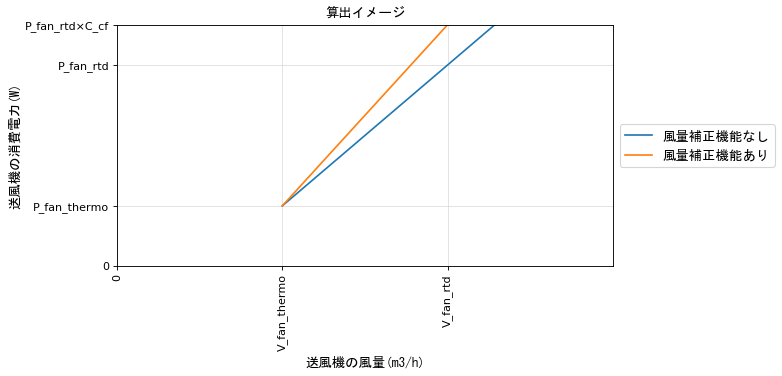

In [17]:
# 算出イメージ
plt.figure(figsize = (8, 4), dpi=80 )
plt.subplot2grid((1, 1), (0, 0))
plt.title('算出イメージ', fontdict={'fontproperties':fp})

q_ac_rtd = 1
V_fan_rtd = 1
P_fan_rtd = 1 
V_fan_thermo =V_fan_rtd * 0.5
P_fan_thermo =P_fan_rtd * 0.3
C_cf = 1.2

for i,category in enumerate(['風量補正機能なし','風量補正機能あり']):
    x_values =np.arange(V_fan_thermo, V_fan_rtd+1.5, 0.05)
    y_values = {'風量補正機能なし' :[P_fan(V_fan_rtd,P_fan_rtd,      V_fan_thermo, P_fan_thermo, V_op) for V_op in x_values],
                '風量補正機能あり' :[P_fan(V_fan_rtd,P_fan_rtd*C_cf, V_fan_thermo, P_fan_thermo, V_op) for V_op in x_values]}[category]
    plt.plot(x_values, y_values, label=category)

        
ax=plt.gca()
ax.set_xlabel('送風機の風量(m3/h)', fontdict={'fontproperties':fp})
ax.set_xticks([0, V_fan_thermo, V_fan_rtd], minor=False)
ax.set_xticklabels(['0', 'V_fan_thermo', 'V_fan_rtd'], minor=False, rotation=90)
ax.set_xbound(lower=0, upper=1.5)

ax.set_ylabel('送風機の消費電力(W)', fontdict={'fontproperties':fp})
ax.set_yticks([0, P_fan_thermo, P_fan_rtd, P_fan_rtd*C_cf], minor=False)
ax.set_yticklabels(['0', 'P_fan_thermo', 'P_fan_rtd', 'P_fan_rtd×C_cf'])
ax.set_ybound(lower=0, upper=1.2)

ax.grid(which='major', color='lightgray', alpha=0.7, linestyle='-')    
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), borderaxespad=0.5, frameon=True, prop=fp)


plt.show()

日付$d$の時刻$t$におけるサーモオフ時の送風機の消費電力$P_{fan,thermo-off,d,t}$は、式(12)により表される。

<p style="text-indent:2em">$t_{fan,thermo-off,d,t} > 0$ かつ $t_{fan,H,d,t-1} > 0$ （暖房サーモオフに移行）の場合：</p>  

$$ 
\begin{equation*}
    P_{fan,thremo-off,d,t} = P_{fan,thermo-off,H}
\end{equation*}
$$

<div style="text-align: right;"> (12-1) </div>

<p style="text-indent:2em">$t_{fan,thermo-off,d,t} > 0$ かつ $t_{fan,C,d,t-1} > 0$ （冷房サーモオフに移行）の場合：</p>   

$$ 
\begin{equation*}
    P_{fan,thremo-off,d,t} = P_{fan,thermo-off,C}
\end{equation*}
$$

<div style="text-align: right;"> (12-2) </div>

<p style="text-indent:2em">$t_{fan,thermo-off,d,t} > 0$ かつ $t_{fan,thermo-off,d,t-1} > 0$ （移行なし）の場合：</p>  

$$ 
\begin{equation*}
    P_{fan,thremo-off,d,t} = P_{fan,thermo-off,d,t-1}
\end{equation*}
$$

<div style="text-align: right;"> (12-3) </div>

<p style="text-indent:2em">$t_{fan,thermo-off,d,t} = 0$ の場合：</p>  

$$ 
\begin{equation*}
    P_{fan,thremo-off,d,t} = 0
\end{equation*}
$$

<div style="text-align: right;"> (12-4) </div>

ここで、  

$P_{fan,thermo-off,d,t}$：日付$d$の時刻$t$におけるサーモオフ時の1時間あたりの送風機の消費電力(W)    
$P_{fan,thermo-off,C}$：冷房サーモオフ時における送風機の消費電力(W)        
$P_{fan,thermo-off,H}$：暖房サーモオフ時における送風機の消費電力(W)       
$t_{fan,C,d,t}$：日付$d$の時刻$t$における冷房時の1時間当たりの送風機の稼働時間(h/h)  
$t_{fan,H,d,t}$：日付$d$の時刻$t$における暖房時の1時間当たりの送風機の稼働時間(h/h)  
$t_{fan,thermo-off,d,t}$：日付$d$の時刻$t$におけるサーモオフ時の1時間当たりの送風機の稼働時間(h/h)  

である。

### 11.3　風量

日付$d$の時刻$t$における暖房時の1時間あたりの送風機の風量$V_{fan,H,d,t}$および冷房時の1時間あたりの送風機の風量$V_{fan,C,d,t}$は、補正処理負荷がゼロの場合にサーモオフ時の風量に等しいとして、式(13)により表される。

<p style="text-indent:2em">$t_{fan,H,d,t} > 0$ （暖房時）の場合：</p>  

$$ 
\begin{equation*}
    V_{fan,H,d,t} = \left\{ \frac{Q'_{T,H,d,t}}{q_{ac,H,rtd} \times 3600 \times 10^{-6}} \times \left( V_{fan,H,rtd} -V_{fan,thermo-off,H} \right) + V_{fan,thermo-off,H} \right\} \times C_{pl,H}
\end{equation*}
$$

<div style="text-align: right;"> (13a-1) </div>

$$ 
\begin{equation*}
    V_{fan,C,d,t} = 0
\end{equation*}
$$

<div style="text-align: right;"> (13b-1) </div>

<p style="text-indent:2em">$t_{fan,C,d,t} > 0$ （冷房時）の場合：</p>  

$$ 
\begin{equation*}
    V_{fan,H,d,t} =0
\end{equation*}
$$

<div style="text-align: right;"> (13a-2) </div>

$$ 
\begin{equation*}
    V_{fan,C,d,t} = \left\{ \frac{Q_{T,C,d,t}}{q_{ac,C,rtd} \times SHF_{ideal} \times 3600 \times 10^{-6}} \times \left( V_{fan,C,rtd} -V_{fan,thermo-off,C} \right) + V_{fan,thermo-off,C} \right\} \times C_{pl,C}
\end{equation*}
$$

<div style="text-align: right;"> (13b-2) </div>

<p style="text-indent:2em">$t_{fan,thermo-off,d,t} > 0$ （サーモオフ時）の場合：</p>  

$$ 
\begin{equation*}
    V_{fan,H,d,t} = 0
\end{equation*}
$$

<div style="text-align: right;"> (13a-3) </div>

$$ 
\begin{equation*}
    V_{fan,C,d,t} = 0
\end{equation*}
$$

<div style="text-align: right;"> (13b-3) </div>

ここで、  

$C_{pl,C}$：冷房時のダクト等圧力損失による風量補正係数(-)  
$C_{pl,H}$：暖房時のダクト等圧力損失による風量補正係数(-)  
$Q_{T,C,d,t}$：日付$d$の時刻$t$における1時間当たりの補正処理冷房負荷(MJ/h)  
$Q'_{T,H,d,t}$：日付$d$の時刻$t$における1時間当たりの補正処理暖房負荷(MJ/h)  
$q_{ac,C,rtd}$：空調機の定格冷房能力(W)   
$q_{ac,H,rtd}$：空調機の定格暖房能力(W)   
$SHF_{ideal}$：理想顕熱比(-)  
$t_{fan,C,d,t}$：日付$d$の時刻$t$における冷房時の1時間当たりの送風機の稼働時間(h/h)  
$t_{fan,H,d,t}$：日付$d$の時刻$t$における暖房時の1時間当たりの送風機の稼働時間(h/h)  
$t_{fan,thermo-off,d,t}$：日付$d$の時刻$t$におけるサーモオフ時の1時間当たりの送風機の稼働時間(h/h)  
$V_{fan,C,d,t}$：日付$d$の時刻$t$における冷房時の1時間あたりの送風機の風量(m3/h)  
$V_{fan,H,d,t}$：日付$d$の時刻$t$における暖房時の1時間あたりの送風機の風量(m3/h)   
$V_{fan,C,rtd}$：定格冷房能力運転時における送風機の風量(m3/h)      
$V_{fan,H,rtd}$：定格暖房能力運転時における送風機の風量(m3/h)    
$V_{fan,thermo-off,C}$：冷房サーモオフ時における送風機の風量(m3/h)    
$V_{fan,thermo-off,H}$：暖房サーモオフ時における送風機の風量(m3/h)    

である。

空調機の定格暖房能力$q_{ac,H,rtd}$および定格冷房能力$q_{ac,C,rtd}$、定格暖房能力運転時における送風機の風量$V_{fan,H,rtd}$および定格冷房能力運転時における送風機の風量$V_{fan,C,rtd}$、暖房サーモオフ運転時における送風機の風量$V_{fan,thermo-off,H}$および冷房サーモオフ運転時における送風機の風量$V_{fan,thermo-off,C}$は、付録Aにより定まる。

理想顕熱比$SHF_{ideal}$は、0.8とする。

ダクト等圧力損失による風量補正係数$C_{pl}$は、ダクト等圧力損失の影響により送風機の風量が低下することを考慮するための係数であり、式(14)により定まる。

$$ 
\begin{equation*}
    C_{pl,H} = \frac{V_{fan,H,dsgn}}{V_{fan,H,rtd}}
\end{equation*}
$$

<div style="text-align: right;"> (14a) </div>

$$ 
\begin{equation*}
    C_{pl,C} = \frac{V_{fan,C,dsgn}}{V_{fan,C,rtd}}
\end{equation*}
$$

<div style="text-align: right;"> (14b) </div>

ここで、  

$C_{pl,C}$：冷房時のダクト等圧力損失による風量補正係数(-)  
$C_{pl,H}$：暖房時のダクト等圧力損失による風量補正係数(-)  
$V_{fan,C,rtd}$：定格冷房能力運転時における送風機の風量(m3/h)      
$V_{fan,C,dsgn}$：冷房時の送風機の設計風量(m3/h)   
$V_{fan,H,rtd}$：定格暖房能力運転時における送風機の風量(m3/h)    
$V_{fan,H,dsgn}$：暖房時の送風機の設計風量(m3/h)   

である。

定格暖房能力運転時における送風機の風量$V_{fan,H,rtd}$および暖房時の送風機の設計風量$V_{fan,H,dsgn}$、定格冷房能力運転時における送風機の風量$V_{fan,C,rtd}$および冷房時の送風機の設計風量$V_{fan,C,dsgn}$は、付録Aにより定まる。

In [18]:
def V_fan(Q_dash_T_H, q_rtd, V_rtd, V_thermo):
    
    # 単位換算：MJ/h => W
    Q_dash_T_H_Wat = Q_dash_T_H / (3600 * 10**(-6))
    
    return Q_dash_T_H_Wat / q_rtd * (V_rtd - V_thermo) + V_thermo

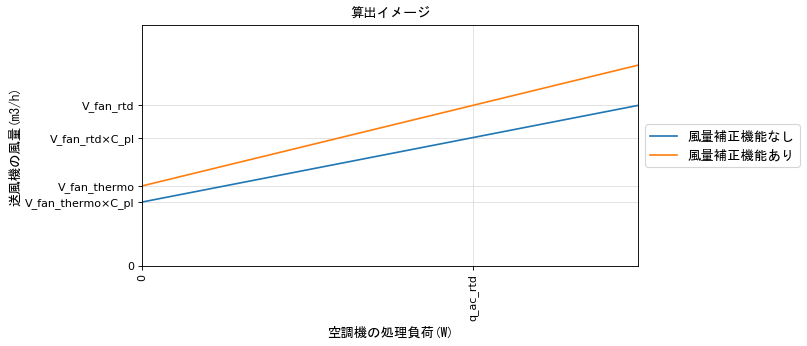

In [19]:
# 算出イメージ
plt.figure(figsize = (8, 4), dpi=80 )
plt.subplot2grid((1, 1), (0, 0))
plt.title('算出イメージ', fontdict={'fontproperties':fp})

q_ac_rtd = 1
V_fan_rtd = 1
P_fan_rtd = 1 
V_fan_thermo =V_fan_rtd * 0.5
P_fan_thermo =P_fan_rtd * 0.3
C_pl = 0.8

for i,category in enumerate(['風量補正機能なし','風量補正機能あり']):
    x_values =np.arange(0, q_ac_rtd*2, 0.05)
    y_values = {'風量補正機能なし' :[V_fan(Q_dash_T_H* (3600 * 10**(-6)), q_ac_rtd, V_fan_rtd*C_pl, V_fan_thermo*C_pl) for Q_dash_T_H in x_values],
                '風量補正機能あり' :[V_fan(Q_dash_T_H* (3600 * 10**(-6)), q_ac_rtd, V_fan_rtd     , V_fan_thermo) for Q_dash_T_H in x_values]}[category]
    plt.plot(x_values, y_values, label=category)

        
ax=plt.gca()
ax.set_xlabel('空調機の処理負荷(W)', fontdict={'fontproperties':fp})
ax.set_xticks([0, q_ac_rtd], minor=False)
ax.set_xticklabels(['0', 'q_ac_rtd'], minor=False, rotation=90)
ax.set_xbound(lower=0, upper=1.5)

ax.set_ylabel('送風機の風量(m3/h)', fontdict={'fontproperties':fp})
ax.set_yticks([0, V_fan_thermo, V_fan_rtd, V_fan_thermo*C_pl, V_fan_rtd*C_pl], minor=False)
ax.set_yticklabels(['0', 'V_fan_thermo', 'V_fan_rtd', 'V_fan_thermo×C_pl', 'V_fan_rtd×C_pl'], minor=False)
ax.set_ybound(lower=0, upper=1.5)

ax.grid(which='major', color='lightgray', alpha=0.7, linestyle='-')    
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), borderaxespad=0.5, frameon=True, prop=fp)


plt.show()

日付$d$の時刻$t$におけるサーモオフ時の送風機の風量$V_{fan,thermo-off,d,t}$は、式(15)により表される。（※サーモオフ時の送風機の風量は、計算には必要ない。個人的な頭の整理のために書くが、後で消す。↓）

<p style="text-indent:2em">$t_{fan,thermo-off,d,t} > 0$ かつ $t_{fan,H,d,t-1} > 0$ （暖房サーモオフに移行）の場合：</p>  

$$ 
\begin{equation*}
    V_{fan,thermoa-off,d,t} = V_{fan,thermoa-off,H}
\end{equation*}
$$

<div style="text-align: right;"> (15-1) </div>

<p style="text-indent:2em">$t_{fan,thermo-off,d,t} > 0$ かつ $t_{fan,C,d,t-1} > 0$ （冷房サーモオフに移行）の場合：</p>  

$$ 
\begin{equation*}
    V_{fan,thermoa-off,d,t} = V_{fan,thermoa-off,C}
\end{equation*}
$$

<div style="text-align: right;"> (15-2) </div>

<p style="text-indent:2em">$t_{fan,thermo-off,d,t} > 0$ かつ $t_{fan,thermo-off,d,t-1} > 0$ （移行なし）の場合：</p>  

$$ 
\begin{equation*}
    V_{fan,thermo-off,d,t} = V_{fan,thermo-off,d,t-1}
\end{equation*}
$$

<div style="text-align: right;"> (15-3) </div>

<p style="text-indent:2em">$t_{fan,thermo-off,d,t} = 0$ の場合：</p>  

$$ 
\begin{equation*}
    V_{fan,thermoa-off,d,t} = 0
\end{equation*}
$$

<div style="text-align: right;"> (15-4) </div>

ここで、  
  
$t_{fan,C,d,t}$：日付$d$の時刻$t$における冷房時の1時間当たりの送風機の稼働時間(h)  
$t_{fan,H,d,t}$：日付$d$の時刻$t$における暖房時の1時間当たりの送風機の稼働時間(h)  
$t_{fan,thermo-off,d,t}$：日付$d$の時刻$t$におけるサーモオフ時の1時間当たりの送風機の稼働時間(h)  
$V_{fan,thermo-off,d,t}$：日付$d$の時刻$t$におけるサーモオフ時の1時間あたりの送風機の風量(m3/h)    
$V_{fan,thermo-off,C}$：冷房サーモオフ時における送風機の風量(m3/h)    
$V_{fan,thermo-off,H}$：暖房サーモオフ時における送風機の風量(m3/h)    

である。（※後で消す範囲は、ここまで↑）

### 11.4　稼働時間

日付$d$の時刻$t$における暖房時の1時間当たりの送風機の稼働時間$t_{fan,H,d,t}$、冷房時の稼働時間$t_{fan,C,d,t}$、サーモオフ時の稼働時間$t_{fan,thermo-off,d,t}$は、式(16)により定まる。

<p style="text-indent:2em">$Q'_{T,H,d,t} > 0$（暖房時）の場合：</p>  
$$ 
\begin{equation*}
    t_{fan,H,d,t} = 1
\end{equation*}
$$

<div style="text-align: right;"> (16a-1) </div>

$$ 
\begin{equation*}
    t_{fan,C,d,t} = 0
\end{equation*}
$$

<div style="text-align: right;"> (16b-1) </div>

$$ 
\begin{equation*}
    t_{fan,thermo-off,d,t} = 0
\end{equation*}
$$

<div style="text-align: right;"> (16c-1) </div>

<p style="text-indent:2em">$Q_{T,C,d,t} > 0$（冷房時）の場合：</p>  
$$ 
\begin{equation*}
    t_{fan,H,d,t} = 0
\end{equation*}
$$

<div style="text-align: right;"> (16a-2) </div>

$$ 
\begin{equation*}
    t_{fan,C,d,t} = 1
\end{equation*}
$$

<div style="text-align: right;"> (16b-2) </div>

$$ 
\begin{equation*}
    t_{fan,thermo-off,d,t} = 0
\end{equation*}
$$

<div style="text-align: right;"> (16c-2) </div>


<p style="text-indent:2em">$Q_{T,H,d,t} = 0$ かつ $Q_{T,C,d,t} = 0$（サーモオフ時）の場合：</p> 
$$ 
\begin{equation*}
    t_{fan,H,d,t} = 0
\end{equation*}
$$

<div style="text-align: right;"> (16a-3) </div>

$$ 
\begin{equation*}
    t_{fan,C,d,t} = 0
\end{equation*}
$$

<div style="text-align: right;"> (16b-3) </div>

$$ 
\begin{equation*}
    t_{fan,thermo-off,d,t} = 1
\end{equation*}
$$

<div style="text-align: right;"> (16c-3) </div>

ここで、  

$Q_{T,C,d,t}$：日付$d$の時刻$t$における1時間当たりの補正処理冷房負荷(MJ/h)  
$Q'_{T,H,d,t}$：日付$d$の時刻$t$における1時間当たりの補正処理暖房負荷(MJ/h)  
$t_{fan,C,d,t}$：日付$d$の時刻$t$における冷房時の1時間当たりの送風機の稼働時間(h/h)  
$t_{fan,H,d,t}$：日付$d$の時刻$t$における暖房時の1時間当たりの送風機の稼働時間(h/h)  
$t_{fan,thermo-off,d,t}$：日付$d$の時刻$t$におけるサーモオフ時の1時間当たりの送風機の稼働時間(h/h)  

である。

## 付録A　機器の性能を表す仕様の決定方法

### A.1　記号及び単位

（省略）

### A.2　全般

本計算方法は、表A.3に示す方法により機器の性能を示す仕様を決定する場合に適用する。

<table style="border-collapse:collapse;">
    <caption>表A.3　機器の性能を表す仕様の決定方法</caption>
    <thead style="background-color:lightgrey" >
        <tr>
            <th style="text-align:center; border:1px solid black;" rowspan=4>No</th>
            <th style="text-align:center; border:1px solid black;" rowspan=2 colspan=6>空調機</th>
            <th style="text-align:center; border:1px solid black;" colspan=6>送風機</th>
        </tr>
        <tr>
            <th style="text-align:center; text-align:center; border:1px solid black;" colspan=4>暖房時および冷房時</th>
            <th style="text-align:center; border:1px solid black;" colspan=2>サーモオフ時</th>
        </tr>
        <tr>
            <th style="text-align:center; border:1px solid black;" colspan=3>能力</th>
            <th style="text-align:center; border:1px solid black;" colspan=3>消費電力</th>
            <th style="text-align:center; border:1px solid black;">風量</th>
            <th style="text-align:center; border:1px solid black;" colspan=3>消費電力</th>
            <th style="text-align:center; border:1px solid black;" rowspan=2>風量</th>
            <th style="text-align:center; border:1px solid black;" rowspan=2>消費電力</th>
        </tr>
        <tr>
            <th style="text-align:center; border:1px solid black;">定格</th>
            <th style="text-align:center; border:1px solid black;">中間</th>
            <th style="text-align:center; border:1px solid black;">最小</th>
            <th style="text-align:center; border:1px solid black;">定格</th>
            <th style="text-align:center; border:1px solid black;">中間</th>
            <th style="text-align:center; border:1px solid black;">最小</th>
            <th style="text-align:center; border:1px solid black;">定格</th>
            <th style="text-align:center; border:1px solid black;">定格</th>
            <th style="text-align:center; border:1px solid black;">中間</th>
            <th style="text-align:center; border:1px solid black;">最小</th>
        </tr>
    </thead>
    <tbody>    
        <tr>
            <td style="border:1px solid black; text-align:center;">1</td>
            <td style="border:1px solid black; text-align:center;">JIS試験</td>
            <td style="border:1px solid black; text-align:center;">JIS試験</td>
            <td style="border:1px solid black; text-align:center;">JIS試験</td>
            <td style="border:1px solid black; text-align:center;">JIS試験</td>
            <td style="border:1px solid black; text-align:center;">JIS試験</td>
            <td style="border:1px solid black; text-align:center;">JIS試験</td>
            <td style="border:1px solid black; text-align:center;">製造業者測定</td>
            <td style="border:1px solid black; text-align:center;">製造業者測定</td>
            <td style="border:1px solid black; text-align:center;">製造業者測定</td>
            <td style="border:1px solid black; text-align:center;">製造業者測定</td>
            <td style="border:1px solid black; text-align:center;">製造業者測定</td>
            <td style="border:1px solid black; text-align:center;">製造業者測定</td>
        </tr>
        <tr>
            <td style="border:1px solid black; text-align:center;">2</td>
            <td style="border:1px solid black; text-align:center;">JIS試験</td>
            <td style="border:1px solid black; text-align:center;">JIS試験</td>
            <td style="border:1px solid black; text-align:center;">式(4)</td>
            <td style="border:1px solid black; text-align:center;">JIS試験</td>
            <td style="border:1px solid black; text-align:center;">JIS試験</td>
            <td style="border:1px solid black; text-align:center;">－</td>
            <td style="border:1px solid black; text-align:center;">製造業者測定</td>
            <td style="border:1px solid black; text-align:center;">製造業者測定</td>
            <td style="border:1px solid black; text-align:center;">製造業者測定</td>
            <td style="border:1px solid black; text-align:center;">－</td>
            <td style="border:1px solid black; text-align:center;">製造業者測定</td>
            <td style="border:1px solid black; text-align:center;">製造業者測定</td>
        </tr>
        <tr>
            <td style="border:1px solid black; text-align:center;">3</td>
            <td style="border:1px solid black; text-align:center;">JIS試験</td>
            <td style="border:1px solid black; text-align:center;">式(3)</td>
            <td style="border:1px solid black; text-align:center;">式(4)</td>
            <td style="border:1px solid black; text-align:center;">JIS試験</td>
            <td style="border:1px solid black; text-align:center;">－</td>
            <td style="border:1px solid black; text-align:center;">－</td>
            <td style="border:1px solid black; text-align:center;">測定</td>
            <td style="border:1px solid black; text-align:center;">式(6)</td>
            <td style="border:1px solid black; text-align:center;">－</td>
            <td style="border:1px solid black; text-align:center;">－</td>
            <td style="border:1px solid black; text-align:center;">式(7)</td>
            <td style="border:1px solid black; text-align:center;">式(8)</td>
        </tr>
        <tr>
            <td style="border:1px solid black; text-align:center;">4</td>
            <td style="border:1px solid black; text-align:center;">式(1)</td>
            <td style="border:1px solid black; text-align:center;">式(3)</td>
            <td style="border:1px solid black; text-align:center;">式(4)</td>
            <td style="border:1px solid black; text-align:center;">－</td>
            <td style="border:1px solid black; text-align:center;">－</td>
            <td style="border:1px solid black; text-align:center;">－</td>
            <td style="border:1px solid black; text-align:center;">式(5)</td>
            <td style="border:1px solid black; text-align:center;">式(6)</td>
            <td style="border:1px solid black; text-align:center;">－</td>
            <td style="border:1px solid black; text-align:center;">－</td>
            <td style="border:1px solid black; text-align:center;">式(7)</td>
            <td style="border:1px solid black; text-align:center;">式(8)</td>
        </tr>
    </tbody> 
</table>

### A.3　空調機

#### A.3.1　定格能力および定格消費電力

空調機の定格暖房能力$q_{ac,H,rtd}$および定格冷房能力$q_{ac,C,rtd}$は、JIS B8616が定める定格暖房標準能力および定格冷房標準能力の定義に基づき、JIS B 8615-2が定める性能試験により得られる値とするか、床面積の合計$A_{A}$に応じて式(1)により算定される値とする。

$$ 
\begin{equation*}
    q_{ac,H,rtd} = q_{ac,H,rq} \times A_{A} \times f_{CT} \times f_{CL}
\end{equation*}
$$

<div style="text-align: right;"> (1a) </div>

$$ 
\begin{equation*}
    q_{ac,C,rtd} = q_{ac,C,rq} \times A_{A} \times f_{CT} \times f_{CL}
\end{equation*}
$$

<div style="text-align: right;"> (1b) </div>

ここで、  

$f_{CT}$：外気温度能力補正係数(-)  
$f_{CL}$：間歇運転能力補正係数(-)  
$q_{ac,C,rtd}$：空調機の定格冷房能力(W)   
$q_{ac,H,rtd}$：空調機の定格暖房能力(W)  
$q_{ac,C,rq}$：空調機の単位床面積当たりの必要冷房能力(W/m<sup>2</sup>)   
$q_{ac,H,rq}$：空調機の単位床面積当たりの必要暖房能力(W/m<sup>2</sup>) 

である。

空調機の単位床面積当たりの必要暖房能力$q_{ac,H,rq}$及び必要冷房能力$q_{ac,C,rq}$は、地域の区分に応じて表A.4により定まる。外気温度能力補正係数$f_{CT}$は、1.05とする。間歇運転能力補正係数$f_{CL}$は、1.0とする。

<table style="border-collapse:collapse;">
    <caption>表A.4 単位面積当たりの必要暖房能力$q_{ac,H,rq}$及び冷房能力$q_{ac,C,rq}$(W/m<sup>2</sup>)</caption>
    <thead style="background-color:lightgrey" >
        <tr>
            <th style="text-align:center; border:1px solid black;" rowspan=2></th>
            <th style="text-align:center; border:1px solid black;" colspan=8>地域の区分</th>
        </tr>
        <tr>
            <th style="text-align:center; text-align:center; border:1px solid black;">1</th>
            <th style="text-align:center; text-align:center; border:1px solid black;">2</th>
            <th style="text-align:center; text-align:center; border:1px solid black;">3</th>
            <th style="text-align:center; text-align:center; border:1px solid black;">4</th>
            <th style="text-align:center; text-align:center; border:1px solid black;">5</th>
            <th style="text-align:center; text-align:center; border:1px solid black;">6</th>
            <th style="text-align:center; text-align:center; border:1px solid black;">7</th>
            <th style="text-align:center; text-align:center; border:1px solid black;">8</th>
        </tr>
    </thead>
    <tbody>    
        <tr>
            <td style="border:1px solid black; text-align:center;">必要暖房能力$q_{ac,H,rq}$</td>
            <td style="border:1px solid black; text-align:center;">73.91</td>
            <td style="border:1px solid black; text-align:center;">64.32</td>
            <td style="border:1px solid black; text-align:center;">62.65</td>
            <td style="border:1px solid black; text-align:center;">66.99</td>
            <td style="border:1px solid black; text-align:center;">72.64</td>
            <td style="border:1px solid black; text-align:center;">61.34</td>
            <td style="border:1px solid black; text-align:center;">64.55</td>
            <td style="border:1px solid black; text-align:center;">－</td>
        </tr>
        <tr>
            <td style="border:1px solid black; text-align:center;">必要冷房能力$q_{ac,C,rq}$</td>
            <td style="border:1px solid black; text-align:center;">37.61</td>
            <td style="border:1px solid black; text-align:center;">36.55</td>
            <td style="border:1px solid black; text-align:center;">42.34</td>
            <td style="border:1px solid black; text-align:center;">54.08</td>
            <td style="border:1px solid black; text-align:center;">61.69</td>
            <td style="border:1px solid black; text-align:center;">60.79</td>
            <td style="border:1px solid black; text-align:center;">72.53</td>
            <td style="border:1px solid black; text-align:center;">61.56</td>
        </tr>

    </tbody> 
</table>

空調機の定格暖房消費電力$P_{ac,H,rtd}$および定格冷房消費電力$P_{ac,C,rtd}$は、JIS B8616が定める定格暖房標準能力および定格冷房標準能力の定義に基づき、JIS B 8615-2が定める性能試験により得られる値とするか、式(2)により算定される値とする。

$$ 
\begin{equation*}
    P_{ac,H,rtd} = \frac{q_{ac,H,rtd}}{e_{H,rtd}}
\end{equation*}
$$

<div style="text-align: right;"> (2a) </div>

$$ 
\begin{equation*}
    P_{ac,C,rtd} = \frac{q_{ac,C,rtd}}{e_{H,rtd}}
\end{equation*}
$$

<div style="text-align: right;"> (2b) </div>

ここで、  

$e_{C,rtd}$：定格冷房能力運転時における空調機の冷房効率(-)   
$e_{H,rtd}$：定格暖房能力運転時における空調機の暖房効率(-)  
$P_{ac,C,rtd}$：空調機の定格冷房消費電力(W)   
$P_{ac,H,rtd}$：空調機の定格暖房消費電力(W)  
$q_{ac,C,rtd}$：空調機の定格冷房能力(W)   
$q_{ac,H,rtd}$：空調機の定格暖房能力(W)  

である。

定格暖房能力運転時における空調機の暖房効率$e_{H,rtd}$は、3.76とする。定格冷房能力運転時における空調機の冷房効率$e_{C,rtd}$は、3.17とする。

#### A.3.2　中間能力

空調機の中間暖房能力$q_{ac,H,mid}$および中間冷房能力$q_{ac,C,mid}$は、JIS B8616が定める中間暖房標準能力および中間冷房標準能力の定義に基づき、JIS B 8615-2が定める性能試験により得られる値とするか、式(3)により算定される値とする。

$$ 
\begin{equation*}
    q_{ac,H,mid} = q_{ac,H,rtd} \times 0.50
\end{equation*}
$$

<div style="text-align: right;"> (3a) </div>

$$ 
\begin{equation*}
    q_{ac,C,mid} = q_{ac,C,rtd} \times 0.50
\end{equation*}
$$

<div style="text-align: right;"> (3b) </div>

ここで、  

$q_{ac,C,mid}$：空調機の中間冷房能力(W)  
$q_{ac,C,rtd}$：空調機の定格冷房能力(W)   
$q_{ac,H,mid}$：空調機の中間暖房能力(W)  
$q_{ac,H,rtd}$：空調機の定格暖房能力(W)  

である。

#### A.3.3　最小能力

空調機の最小暖房能力$q_{ac,H,min}$最小冷房能力$q_{ac,C,min}$は、JIS B8616が定める最小暖房標準能力および最小冷房標準能力の定義に基づき、JIS B 8615-2が定める性能試験により得られる値とするか、式(4)により算定される値とする。

$$ 
\begin{equation*}
    q_{ac,H,min} = q_{ac,H,rtd} \times 0.35
\end{equation*}
$$

<div style="text-align: right;"> (4a) </div>

$$ 
\begin{equation*}
    q_{ac,C,min} = q_{ac,C,rtd} \times 0.35
\end{equation*}
$$

<div style="text-align: right;"> (4b) </div>

ここで、  

$q_{ac,C,min}$：空調機の最小冷房能力(W)  
$q_{ac,C,rtd}$：空調機の定格冷房能力(W)   
$q_{ac,H,min}$：空調機の最小暖房能力(W)  
$q_{ac,H,rtd}$：空調機の定格暖房能力(W)  

である。

### A.4　送風機

#### A.4.1　定格能力運転時の風量及び消費電力

定格暖房能力運転時における送風機の風量$V_{fan,H,rtd}$および消費電力$P_{fan,H,rtd}$、定格冷房能力運転時における送風機の風量$V_{fan,C,rtd}$および消費電力$P_{fan,C,rtd}$は、室内側および室外側の送風機の風量をJIS B8615-2が定める空調機の性能試験による定格能力の測定時と同一の風量に固定し、かつ、圧縮機が停止した状態で測定した値とするか、式(5)および式(6)により求めた値とする。但し、測定により値を求める場合、測定時の凝縮器の表面状態（凝縮水）は不問とする。

$$ 
\begin{equation*}
    V_{fan,H,rtd} = \left( 1.69 \times q_{ac,H,rtd} \times 10^{-3} +14.5 \right) \times 60
\end{equation*}
$$

<div style="text-align: right;"> (5a) </div>

$$ 
\begin{equation*}
    P_{fan,H,rtd} = 8.0 \times \frac{V_{ac,H,rtd}}{60} +20.7
\end{equation*}
$$

<div style="text-align: right;"> (6a) </div>

$$ 
\begin{equation*}
    V_{fan,C,rtd} = \left( 1.69 \times q_{ac,C,rtd} \times 10^{-3} +14.5 \right) \times 60
\end{equation*}
$$

<div style="text-align: right;"> (5b) </div>

$$ 
\begin{equation*}
    P_{fan,C,rtd} = 8.0 \times \frac{V_{ac,C,rtd}}{60} +20.7
\end{equation*}
$$

<div style="text-align: right;"> (6b) </div>

ここで、  

$P_{fan,C,rtd}$：定格冷房能力運転時における送風機の消費電力(W)   
$P_{fan,H,rtd}$：定格暖房能力運転時における送風機の消費電力(W)   
$q_{ac,C,rtd}$：空調機の定格冷房能力(W)    
$q_{ac,H,rtd}$：空調機の定格暖房能力(W)  
$V_{fan,C,rtd}$：定格冷房能力運転時における送風機の風量(m3/h)      
$V_{fan,H,rtd}$：定格暖房能力運転時における送風機の風量(m3/h)    

である。

#### A.4.2　中間能力運転時の消費電力

中間暖房能力運転時の送風機の消費電力$P_{fan,H,mid}$及び中間冷房能力運転時の送風機の消費電力$P_{fan,C,mid}$は、室内側および室外側の送風機の風量をJIS B8615-2が定める空調機の性能試験による中間能力の測定時と同一の風量に固定し、かつ、圧縮機が停止した状態で測定した値とする。

#### A.4.3　最小能力運転時の消費電力

最小暖房能力運転時の送風機の消費電力$P_{fan,H,min}$及び最小冷房能力運転時の送風機の消費電力$P_{fan,C,min}$は、室内側および室外側の送風機の風量をJIS B8615-2が定める空調機の性能試験による最小能力の測定時と同一の風量に固定し、かつ、圧縮機が停止した状態で測定した値とする。

#### A.4.4　サーモオフ時の風量及び消費電力

暖房サーモオフ時の送風機の風量$V_{fan,thermoa-off,H}$および消費電力$P_{fan,thermoa-off,H}$、冷房サーモオフ時の送風機の風量$V_{fan,thermoa-off,C}$および消費電力$P_{fan,thermoa-off,C}$は、JIS B8616に定義されるサーモオフの状態（『圧縮機が停止し室内ユニットに冷媒が供給されず、熱交換が行われない状態』）で室内温度検知等の目的で室内側の送風機を稼働する場合の消費電力および標準空気基準の風量であり、JIS B8615-2が定める室内側風量の設定の下に測定した値か、表A.5および表A.6により定まる値とする。

<table style="border-collapse:collapse;">
    <caption>表A.5 サーモオフ時の送風機の風量</caption>
    <thead style="background-color:lightgrey" >
        <tr>
            <th style="text-align:center; border:1px solid black;" >暖房サーモオフ時<br/>$V_{fan,thermoa-off,H}$<br/>(m3/h)</th>
            <th style="text-align:center; border:1px solid black;" >冷房サーモオフ時<br/>$V_{fan,thermoa-off,C}$<br/>(m3/h)</th>
        </tr>
    </thead>
    <tbody>    
        <tr>
            <td style="border:1px solid black; text-align:center;">870</td>
            <td style="border:1px solid black; text-align:center;">870</td>
        </tr>
    </tbody> 
</table>

<table style="border-collapse:collapse;">
    <caption>表A.6 サーモオフ時の送風機の消費電力</caption>
    <thead style="background-color:lightgrey" >
        <tr>
            <th style="text-align:center; border:1px solid black;" >暖房サーモオフ時<br/>$P_{fan,thermoa-off,H}$<br/>(W)</th>
            <th style="text-align:center; border:1px solid black;" >冷房サーモオフ時<br/>$P_{fan,thermoa-off,C}$<br/>(W)</th>
        </tr>
    </thead>
    <tbody>    
        <tr>
            <td style="border:1px solid black; text-align:center;">137</td>
            <td style="border:1px solid black; text-align:center;">137</td>
        </tr>
    </tbody> 
</table>

なお、サーモオフ時の消費電力は、厳密には送風機だけでなく制御用基板等の補器の消費電力も含めた値である。

#### A.4.5　設計風量

風量補正機能がない場合、暖房時の送風機の設計風量$V_{fan,H,dsgn}$および冷房時の送風機の設計風量$V_{fan,C,dsgn}$は、第五章「換気設備」付録Bの計算方法により求めた値とするか、式(7)により計算される値とする。

$$ 
\begin{equation*}
    V_{fan,H,dsgn} = V_{fan,H,rtd} \times 0.79
\end{equation*}
$$

<div style="text-align: right;"> (7a) </div>

$$ 
\begin{equation*}
    V_{fan,C,dsgn} = V_{fan,C,rtd} \times 0.79
\end{equation*}
$$

<div style="text-align: right;"> (7b) </div>

ここで、  
 
$V_{fan,C,rtd}$：定格冷房能力運転時における送風機の風量(m3/h)      
$V_{fan,C,dsgn}$：冷房時の送風機の設計風量(m3/h)   
$V_{fan,H,rtd}$：定格暖房能力運転時における送風機の風量(m3/h)    
$V_{fan,H,dsgn}$：暖房時の送風機の設計風量(m3/h)   

である。

風量補正機能がある場合、暖房時の送風機の設計風量$V_{fan,H,dsgn}$は定格冷房能力運転時における送風機の風量$V_{fan,C,rtd}$に等しいとし、冷房時の送風機の設計風量$V_{fan,C,dsgn}$は定格冷房能力運転時における送風機の風量$V_{fan,C,rtd}$に等しいとする。

### A.5　複数のダクト式セントラル空調機が設置される場合の仕様の決定方法

（工事中　※枠組みは、現行の算定方法と同じ）

## 付録B　風量補正機能に関する空調機の消費電力補正係数

暖房時の風量補正機能に関する空調機の消費電力補正係数$C_{cf,H}$及び冷房時の風量補正機能に関する空調機の消費電力補正係数$C_{cf,C}$は、ダクト等圧力損失の影響により所定の風量に達しない場合に送風機の周波数が増段すること（風量補正機能）による空調機の消費電力の増加を考慮するための係数である。

風量補正機能がない場合、暖房時の風量補正機能に関する空調機の消費電力補正係数$C_{cf,H}$及び冷房時の風量補正機能に関する空調機の消費電力補正係数$C_{cf,C}$は、1.0とする。

風量補正機能がある場合、暖房時の風量補正機能に関する空調機の消費電力補正係数$C_{cf,H}$及び冷房時の風量補正機能に関する空調機の消費電力補正係数$C_{cf,C}$は、設計圧力損失と標準機外静圧との比に応じて表B.1により定まる。

<table style="border-collapse:collapse;">
    <caption>表B.1 風量補正機能がある場合の風量補正機能に関する空調機の消費電力補正係数</caption>
    <thead style="background-color:lightgrey" >
        <tr>
            <th style="text-align:center; border:1px solid black;">設計圧力損失 / 標準機外静圧</th>
            <td style="text-align:center; border:1px solid black;">暖房時$C_{cf,H}$</td>
            <td style="text-align:center; border:1px solid black;">冷房時$C_{cf,H}$</td>
        </tr>
    </thead>
    <tbody>    
        <tr>
            <td style="border:1px solid black; text-align:center;">1.0以下</td>
            <td style="border:1px solid black; text-align:center;">1.00</td>
            <td style="border:1px solid black; text-align:center;">1.00</td>
        </tr>
        <tr>
            <td style="border:1px solid black; text-align:center;">1.0を超え1.1以下</td>
            <td style="border:1px solid black; text-align:center;">1.01</td>
            <td style="border:1px solid black; text-align:center;">1.01</td>
        </tr>
        <tr>
            <td style="border:1px solid black; text-align:center;">1.1を超え1.2以下</td>
            <td style="border:1px solid black; text-align:center;">1.02</td>
            <td style="border:1px solid black; text-align:center;">1.02</td>
        </tr>
        <tr>
            <td style="border:1px solid black; text-align:center;">1.2を超える</td>
            <td style="border:1px solid black; text-align:center;">1.03</td>
            <td style="border:1px solid black; text-align:center;">1.03</td>
        </tr>
    </tbody> 
</table>

設計圧力損失は、第五章「換気設備」付録Bの計算方法により求まる値とするか、125 Paとする。標準機外静圧は、製造業者が指定する値とするか、100 Paとする。

## 付録C　断熱区画外ダクト熱損失による処理暖房負荷補正係数

（工事中　※変数名を変更したが、算定方法は現行と同じ）

## 付録D　冷凍サイクルの理論効率

### D.3　冷凍サイクルの理論暖房効率

冷凍サイクルの理論暖房効率$e_{th,H,op}$は、式(1)により定まる。

$$ 
\begin{equation*} 
    e_{th,H,op} = -0.0032 \times f_{H} \left( \theta_{ex} , \: \theta_{surf,hex} \right) ^{4} +0.1196 \times f_{H} \left( \theta_{ex} , \: \theta_{surf,hex} \right) ^{3} -1.7392 \times f_{H} \left( \theta_{ex} , \: \theta_{surf,hex} \right) ^{2} +12.242 \times f_{H} \left( \theta_{ex} , \: \theta_{surf,hex} \right)  -25.821
\end{equation*}
$$

<div style="text-align: right;"> (1) </div>

ここで、  

$f_{H} \left( \theta_{ex} , \: \theta_{hex} \right)$：＊＊＊＊  
$e_{th,H,op}$：任意の能力による運転時における冷凍サイクルの理論暖房効率(-)  
$\theta_{ex}$：外気温度(℃)  
$\theta_{surf,hex}$：室内機熱交換器表面温度(℃)

である。

In [20]:
def e_th_H_op(f_H):
    '''冷凍サイクルの理論暖房効率(-)を計算する'''
    # f_H:
    
    return -0.0032*f_H**(4) +0.1196*f_H**(3) -1.7392*f_H**(2) +12.242**f_H -25.821

＊＊＊＊$f_{H} \left( \theta_{ex} , \: \theta_{surf,hex} \right)$は、式(2)により表される。

$$ 
\begin{equation*} 
    f_{H} \left( \theta_{ex} , \: \theta_{surf,hex} \right) = 15.38582 + 0.255506 \times \theta_{ex} -0.23883 \times \theta_{surf,hex} 
\end{equation*}
$$

<div style="text-align: right;"> (2) </div>

ここで、  

$f_{H} \left( \theta_{ex} , \: \theta_{surf,hex} \right)$：＊＊＊＊  
$\theta_{ex}$：外気温度(℃)  
$\theta_{surf,hex}$：室内機熱交換器の表面温度(℃)

である。

In [21]:
def f_H(theta_ex, theta_surf_hex):
    '''＊＊＊＊を計算する'''
    # theta_ex：外気温度（℃）
    # theta_surf_hex：室内機熱交換器の表面温度（℃）
    
    return 15.38582 +0.255506*theta_ex -0.23883*theta_surf_hex

### D.4　室内機熱交換器表面温度

室内機熱交換器表面温度$\theta_{surf,hex}$は、式(3)により表される。

$$ 
\begin{equation*} 
    \theta_{surf,hex} = \frac{\theta_{air,{\textit inlet}} + \theta_{air,outlet}}{2} + \frac{Q'_{T} \div \left( 3600 \times 10^{-3} \right)}{A_{e, hex} \times \alpha_{c,hex}}
\end{equation*}
$$

<div style="text-align: right;"> (3) </div>

ここで、  

$A_{e,hex}$：室内機熱交換器の表面積のうち熱交換に有効な面積(m2)  
$Q'_{T}$：1時間当たりの補正処理負荷(MJ/h)  
$\theta_{surf,hex}$：室内機熱交換器の表面温度(℃)  
$\theta_{air,{\textit inlet}}$：室内機吸込空気の温度(℃)  
$\theta_{air,outlet}$：室内機吹出空気の温度(℃)   
$\alpha_{c,hex}$：室内機熱交換器表面の顕熱伝達率(kW/(m2・K))

である。

室内機吸込空気の温度$\theta_{air,{\textit inlet}}$は、暖房設定温度$\theta_{ref}$（20 ℃）とする。室内機熱交換器の表面積のうち熱交換に有効な面積$A_{e,hex}$は、6.396 m<sup>2</sup>とする。

In [22]:
def theta_surf_hex(Q_dash_T, theta_air_outlet, alpha_c_hex):
    '''室内機熱交換器表面温度(℃) を計算する'''
    # A_e_hex：室内機熱交換器の表面積のうち熱交換に有効な面積(m2) 
    # Q_dash_T：1時間当たりの補正処理負荷(MJ/h)
    # theta_air_inlet：室内機吸込空気の温度(℃)
    # theta_air_outlet：室内機吹出空気の温度(℃)
    # alpha_c_hex：室内機熱交換器表面の顕熱伝達率(kW/(m2・K))
    
    theta_air_inlet = 20
    A_e_hex = 6.396
    
    return (theta_air_inlet + theta_air_outlet) / 2 + (Q_dash_T/3600*10**(-3)) / (A_e_hex * alpha_c_hex) 

室内機吹出空気の温度$\theta_{air,outlet}$は、式(4)により表される。

$$ 
\begin{equation*} 
    \theta_{air,outlet} = \theta_{air,{\textit inlet}} + \frac{Q'_{T} \div \left( 3600 \times 10^{-3} \right)}{V_{fan} \div 3600 \times \rho_{air,{\textit inlet}} \times C_{p, {\textit inlet}}}
\end{equation*}
$$

<div style="text-align: right;"> (4) </div>

ここで、  

$C_{p,{\textit inlet}}$：室内機吸込空気の定圧比熱(kJ/(kg・K))  
$Q'_{T}$：1時間当たりの補正処理負荷(MJ/h)  
$V_{fan}$：送風機の風量(m3/h)  
$\theta_{air,{\textit inlet}}$：室内機吸込空気の温度(℃)  
$\theta_{air,outlet}$：室内機吹出空気の温度(℃)     
$\rho_{air,{\textit inlet}}$：室内機吸込空気の密度(kg/m3)

である。

In [23]:
def theta_air_outlet(Cp_inlet, Q_dash_T, V_fan, theta_air_inlet, rho_air_inlet):
    '''室内機吹出し空気温度(℃)を計算する'''
    # Cp_inlet：室内機吸込空気の定圧比熱(kJ/(kg・K))
    # Q_dash_T：1時間当たりの補正処理負荷(MJ/h)
    # V_fan：送風機の風量(m3/h) 
    # theta_air_inlet：室内機吸込空気温度(℃)
    # rho_air_inlet：室内機吸込空気の密度(kg/m3)
      
    return theta_air_inlet + (Q_dash_T/(3600*10**(-3))) / (V_fan/3600 *rho_air_inlet *Cp_inlet)

室内機吸込空気の密度$\rho_{air,{\textit inlet}}$は、式(5)により表される。

$$ 
\begin{equation*} 
    \rho_{air,{\textit inlet}} = \frac{1}{0.004555 \times \left( 0.622 + X_{air,{\textit inlet}} \right) \times T_{air,{\textit inlet}}}
\end{equation*}
$$

<div style="text-align: right;"> (5) </div>

ここで、  

$X_{air,{\textit inlet}}$：室内機吸込空気の絶対湿度(kg/kg(DA))  
$T_{air,{\textit inlet}}$：室内機吸込空気の絶対温度(K)   
$\rho_{air,{\textit inlet}}$：室内機吸込空気の密度(kg/m3)  

である。

室内機吸込空気の絶対温度$T_{air,{\textit inlet}}$は、式(6)により表される。

$$ 
\begin{equation*} 
    T_{air,{\textit inlet}} =  \theta_{air,{\textit inlet}} + 273.15
\end{equation*}
$$

<div style="text-align: right;"> (6) </div>

ここで、  

$T_{air,{\textit inlet}}$：室内機吸込空気の絶対温度(K)   
$\theta_{air,{\textit inlet}}$：室内機吸込空気の温度(℃)  

である。

室内機吸込空気の温度$\theta_{air,{\textit inlet}}$は、暖房設定温度$\theta_{ref}$に等しく、20℃とする。

室内機吸込空気の絶対湿度$X_{air,{\textit inlet}}$は、室内機吸込空気の温度$\theta_{air,{\textit inlet}}$および相対湿度$h_{air,{\textit inlet}}$を用いて、第十一章第一節により算定される。室内機吸込空気の相対湿度$h_{air,{\textit inlet}}$は、59%とする。

In [24]:
def rho_air(T, X):
    '''空気の密度(kg/m3)を計算する'''
    # T：空気の絶対温度(K)
    # X：空気の絶対湿度(kg/kg(DA))
    
    return 1 / (0.004555 * (0.622 + X) * T) 

室内機吸込空気の定圧比熱$C_{p,{\textit inlet}}$は、式(7)により表される。

$$ 
\begin{equation*} 
    C_{p,{\textit inlet}} =  C_{p_{air}} + X_{air,{\textit inlet}} \times C_{p_{w}}
\end{equation*}
$$

<div style="text-align: right;"> (7) </div>

ここで、  

$C_{p,{\textit inlet}}$：室内機吸込空気の定圧比熱(kJ/(kg・K))  
$C_{p_{air}}$：乾き空気の定圧比熱(kJ/(kg(DA)・K))  
$C_{p_{w}}$：水蒸気の定圧比熱(kJ/(kg・K))  
$X_{air,{\textit inlet}}$：室内機吸込空気絶対湿度(kg/kg(DA))  

である。

乾き空気の定圧比熱$C_{p_{air}}$は、1.006 kJ/(kg・K)とする。水蒸気の定圧比熱$C_{p_{w}}$は、1.846 kJ/(kg・K)とする。

In [25]:
def Cp(X):
    '''湿り空気の定圧比熱(kJ/(kg・K))を計算する'''
    # X：空気の絶対湿度(kg/kg(DA))
    # Cp_air：乾き空気の定圧比熱(kJ/(kg・K))
    # Cp_w：水蒸気の定圧比熱(kJ/(kg・K))
    
    Cp_air = 1.006
    Cp_w = 1.846
    
    return Cp_air  + X * Cp_w

室内機熱交換器表面の顕熱伝達率$\alpha_{c,hex}$は、式(8)により表される。

$$ 
\begin{equation*} 
    \alpha_{c,hex} = -0.001679 \times \left( \frac{V_{fan} \div 3600}{A_{f,hex}} \right)^{2}  -0.0044019 \times \frac{V_{fan} \div 3600}{A_{f,hex}} +0.02706
\end{equation*} 
$$

<div style="text-align: right;"> (8) </div>

ここで、  

$A_{f,hex}$：室内機熱交換器の前面面積のうち熱交換に有効な面積(m2)  
$V_{fan}$：送風機の風量(m3/h)  
$\alpha_{c,hex}$：室内機熱交換器表面の顕熱伝達率(kW/(m2・K))  

である。

室内機熱交換器の前面面積のうち熱交換に有効な面積$A_{f,hex}$は、0.23559 m<sup>2</sup>とする。

In [26]:
def alpha_c_hex(V_fan):
    '''室内機熱交換器表面の顕熱伝達率(kW/(m2・K)) を計算する'''
    # A_f_hex：室内機熱交換器の前面面積のうち熱交換に有効な面積(m2)  
    # V_fan：送風機の風量(m3/h)  
    
    A_f_hex = 0.23559
    v = V_fan / 3600 / A_f_hex
    
    return -0.001679*v**(2) -0.0044019*v +0.0276 